### Project 3: Investigate a Dataset


#### Dataset: Medical Appointment No Shows 
##### Source: **[Kaggle(Medical Appointment No Shows)](https://www.kaggle.com/joniarroba/noshowappointments/data)**
#### By : Vishal Kandagatla
#### Contents
 1. Introduction
 2. Data Cleaning and Wrangling
 3. Exploratory Data Analysis
 4. Conclusion

### 1. Introduction 
The dataset consists of 100k medical appointment records of patients in brazil who show-up and do not show-up for the appointment. This analysis tries to identify patterns in data leading to No-Show and investigates variables in the dataset.
#### Dependent variables
* No Show

#### Independent Variables
* Neighborhood
* Age
* Gender
* Scheduled Day
* Appointment Day
* Scholarship
* Medical Conditions
* SMS_received

#### Questions to investigate
1. What is the percentage of No Show among the population?
2. What percentage of Male and Female do not Show-Up ?
3. Who visit doctor more often ?
4. How is Probability of Show Up with respect to different features ?
5. How does Show-Up/No-Show distribute over a week and Day?
6. Do patients with different Medical conditions show similar trend of Show-Up over day?
7. Do patients with different Medical conditions show different Show-Up rate over day?
8. Do patients with different Medical conditions show similar trend of Show-Up over week?
9. Do patients with different Medical conditions show different Show-Up rate over week?
10. How is Show-Up Rate of patients among different age groups ?
11. How is Show-Up rate of patients based on gender ?
12. Is there any correlation between variables?

In [55]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot,iplot_mpl,download_plotlyjs,enable_mpl_offline
import plotly.graph_objs as go
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
%matplotlib inline

In [56]:
# Reading the input file
noshow_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [57]:
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values in rows, so no rows need to be removed from the data. Not all columns are needed for analysis. I will be removing few columns and creating few columns for ease of analysis in further steps.

In [58]:
# checking data types
noshow_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [59]:
# cheking for uniques values among few variables

print('Age: ', sorted (noshow_df.Age.unique()))
print('Alcoholism: ', sorted (noshow_df.Alcoholism.unique()))
print('Diabetes: ', sorted (noshow_df.Diabetes.unique()))
print('Gender: ', sorted (noshow_df.Gender.unique()))
print('Handcap: ', sorted (noshow_df.Handcap.unique()))
print('Hipertension: ', sorted (noshow_df.Hipertension.unique()))
print('Scholarship: ', sorted (noshow_df.Scholarship.unique()))
print('SMS_received:', sorted (noshow_df.SMS_received.unique()))

Age:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Alcoholism:  [0, 1]
Diabetes:  [0, 1]
Gender:  ['F', 'M']
Handcap:  [0, 1, 2, 3, 4]
Hipertension:  [0, 1]
Scholarship:  [0, 1]
SMS_received: [0, 1]


In [60]:
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Description of variables
* Among the above variables Age has outliers few of them being -1 and few above 100
* ScheduledDay: The day someone called or registered the appointment
* AppointmentDay: The day of the actuall appointment, when they have to visit the doctor
* Neighbourhood: Where the appointment takes place
* various medical conditions (0: Having no condition, 1: Having condition) 
* No-show (No: Showed up ,Yes: Didnt Show up)
* Gender (M: Male, F: Female)
* Handicap (0: No disability, 1: Mild, 2: Moderate, 3: Severe ,4: Profund )
* SMS_received:(0: Not received,1: Received)
* Scholorship:(0: Not received,1: Received)

### 2. Data Cleaning and Wrangling

 #### Renaming column names

In [61]:
#renaming the column name to avoid confusion 
noshow_df.rename(columns={'No-show': 'Status','Hipertension': "Hypertension", "Handcap": "Handicap" }, inplace=True)

#### Removing outliers in age and categorizing them into groups

In [62]:
# Removing negetive ages and ages above 100
noshow_df = noshow_df[(noshow_df['Age']>=0) & (noshow_df['Age']<100)]

In [63]:
# categorizing ages
def ageGroup(x):
    if x < 10:
        return "Kids"
    elif x >= 10 and x <=18:
        return "Teens"
    elif x >18 and x <= 35:
        return "Young Adults"
    elif x >35 and x <= 65:
        return "Older Adults"
    else:
        return "Seniors"

In [64]:
noshow_df['AgeGroup'] = noshow_df['Age'].apply(ageGroup)

#### Changing values in status

In [65]:
# changing the values of status to avoid confusion
# No: Show-Up, Yes: No-Show
noshow_df['Status'] = noshow_df.Status.apply(lambda x: 'No-Show' if x=='Yes' else 'Show-Up')
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Show-Up,Older Adults
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Show-Up,Older Adults
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Show-Up,Older Adults
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Show-Up,Kids
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Show-Up,Older Adults


#### Formatting Dates

In [66]:
# converting dates to datetime format 
noshow_df['Registration_Date'] = noshow_df['ScheduledDay'].str.split('T').str[0]
noshow_df['Registration_Date'] = noshow_df['Registration_Date'].astype('datetime64[ns]')
noshow_df['RegistrationTime'] = noshow_df['ScheduledDay'].str.split('T').str[-1].str.replace('Z','')
noshow_df['Appointment_Date'] = noshow_df['AppointmentDay'].str.split('T').str[0]
noshow_df['Appointment_Date'] = noshow_df['Appointment_Date'].astype('datetime64[ns]')

In [67]:
# creating columns for day and month of regestration and appointmnt
noshow_df['AppointmentMonth'] = noshow_df['Appointment_Date'].dt.month
noshow_df['DayOfWeek'] = pd.to_datetime(noshow_df['Appointment_Date']).apply(lambda x: x.isoweekday())
noshow_df["HourOfDay"]= pd.to_datetime(noshow_df.RegistrationTime).dt.hour
noshow_df['WaitingDays'] = (noshow_df.Appointment_Date-noshow_df.Registration_Date).dt.days
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,SMS_received,Status,AgeGroup,Registration_Date,RegistrationTime,Appointment_Date,AppointmentMonth,DayOfWeek,HourOfDay,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,0,Show-Up,Older Adults,2016-04-29,18:38:08,2016-04-29,4,5,18,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,0,Show-Up,Older Adults,2016-04-29,16:08:27,2016-04-29,4,5,16,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,0,Show-Up,Older Adults,2016-04-29,16:19:04,2016-04-29,4,5,16,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,0,Show-Up,Kids,2016-04-29,17:29:31,2016-04-29,4,5,17,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,0,Show-Up,Older Adults,2016-04-29,16:07:23,2016-04-29,4,5,16,0


#### Removing unwanted columns from the data

In [68]:
noshow_df.drop(['PatientId','AppointmentID','AppointmentDay','ScheduledDay','RegistrationTime','Neighbourhood','Scholarship','SMS_received'],axis=1,inplace=True)

In [69]:
noshow_df.head()

,Gender,Age,Hypertension,Diabetes,Alcoholism,Handicap,Status,AgeGroup,Registration_Date,Appointment_Date,AppointmentMonth,DayOfWeek,HourOfDay,WaitingDays
0,F,62,1,0,0,0,Show-Up,Older Adults,2016-04-29,2016-04-29,4,5,18,0
1,M,56,0,0,0,0,Show-Up,Older Adults,2016-04-29,2016-04-29,4,5,16,0
2,F,62,0,0,0,0,Show-Up,Older Adults,2016-04-29,2016-04-29,4,5,16,0
3,F,8,0,0,0,0,Show-Up,Kids,2016-04-29,2016-04-29,4,5,17,0
4,F,56,1,1,0,0,Show-Up,Older Adults,2016-04-29,2016-04-29,4,5,16,0


In [70]:
# Unique values among the three columns
print('Months:',sorted(noshow_df.AppointmentMonth.unique()))
print('Days in week:',sorted(noshow_df.DayOfWeek.unique()))
print('Hours in a day:',sorted(noshow_df.HourOfDay.unique()))

Months: [4, 5, 6]
Days in week: [1, 2, 3, 4, 5, 6]
Hours in a day: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


Data shows that Medical appointments data only consists data collected during april, may and june 2016 from 6am-9pm, and sundays are exempted while collecting the data. Analysing other variables over month would not be very usefull, so im dropping AppointmentMonth column aswell from the dataset for analysis.

In [71]:
noshow_df.drop(['AppointmentMonth'],axis=1,inplace=True)

In [72]:
cols = list(noshow_df.columns.values)
cols

['Gender',
 'Age',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'Status',
 'AgeGroup',
 'Registration_Date',
 'Appointment_Date',
 'DayOfWeek',
 'HourOfDay',
 'WaitingDays']

#### Rearranging Columns

In [73]:
# arranging columns
noshow_df = noshow_df[['Gender', 'Age','AgeGroup','Registration_Date','Appointment_Date','DayOfWeek','HourOfDay','WaitingDays','Hypertension','Diabetes','Alcoholism','Handicap','Status']]
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110515 entries, 0 to 110526
Data columns (total 13 columns):
Gender               110515 non-null object
Age                  110515 non-null int64
AgeGroup             110515 non-null object
Registration_Date    110515 non-null datetime64[ns]
Appointment_Date     110515 non-null datetime64[ns]
DayOfWeek            110515 non-null int64
HourOfDay            110515 non-null int64
WaitingDays          110515 non-null int64
Hypertension         110515 non-null int64
Diabetes             110515 non-null int64
Alcoholism           110515 non-null int64
Handicap             110515 non-null int64
Status               110515 non-null object
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.8+ MB


In [74]:
noshow_df.head()

,Gender,Age,AgeGroup,Registration_Date,Appointment_Date,DayOfWeek,HourOfDay,WaitingDays,Hypertension,Diabetes,Alcoholism,Handicap,Status
0,F,62,Older Adults,2016-04-29,2016-04-29,5,18,0,1,0,0,0,Show-Up
1,M,56,Older Adults,2016-04-29,2016-04-29,5,16,0,0,0,0,0,Show-Up
2,F,62,Older Adults,2016-04-29,2016-04-29,5,16,0,0,0,0,0,Show-Up
3,F,8,Kids,2016-04-29,2016-04-29,5,17,0,0,0,0,0,Show-Up
4,F,56,Older Adults,2016-04-29,2016-04-29,5,16,0,1,1,0,0,Show-Up


Here is the final dataset after cleaning on which im going to analyze various features.

### 3. Exploratory Data Analysis

### Gender Based Patterns

#### 1. What is the percentage of No Show among the population?

In [75]:
noshow = noshow_df['Status'].value_counts()
print(noshow)

Show-Up    88199
No-Show    22316
Name: Status, dtype: int64


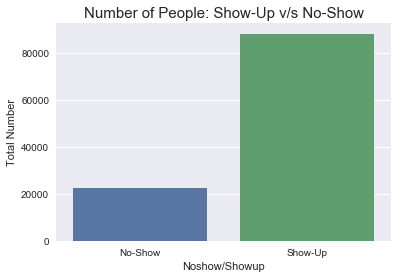

In [76]:
group = noshow_df.groupby(['Status'])
gps = group.size()
ax = sns.barplot(x=gps.index.tolist(), y=gps.values)
sns.plt.title("Number of People: Show-Up v/s No-Show", fontsize = '15')
sns.plt.xlabel("Noshow/Showup")
sns.plt.ylabel("Total Number")
sns.plt.show()

In [77]:
#Percentage no-shows over entire population
percent_no_show = (noshow[1]/ noshow.sum()) * 100
print('Percentage of patients not attending appointments: {}%'.format(round(percent_no_show,2)))

Percentage of patients not attending appointments: 20.19%


#### 2. What percentage of Male and Female do not Show-Up ?

In [78]:
# Function to calcuate and return percentage
def percentage_NoShow(dataset,group_by):
    df = pd.crosstab(index = dataset[group_by],columns = dataset.Status).reset_index()
    df['Percentage'] = (df['No-Show']/(df['Show-Up']+df['No-Show']))*100
    return df[[group_by,'Percentage']]

In [79]:
percentage = percentage_NoShow(noshow_df,'Gender')
percentage

Status,Gender,Percentage
0,F,20.31324
1,M,19.96898


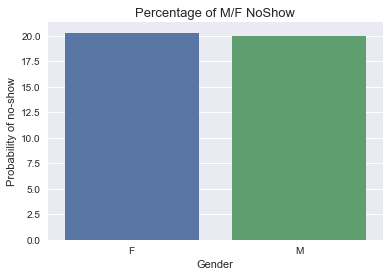

In [80]:
sns.barplot(x = 'Gender', y = 'Percentage', data = percentage)
sns.plt.title("Percentage of M/F NoShow", fontsize = '13')
plt.xlabel('Gender')
plt.ylabel('Probability of no-show')
plt.show()

Nearly 20% of Male and Female do not show up on day of Appointment

#### 3. Who visit doctor more often ?

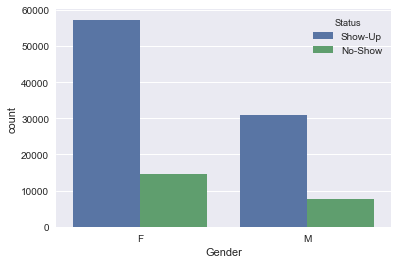

In [81]:
g = sns.countplot(x='Gender',hue='Status',data=noshow_df)
plt.show()

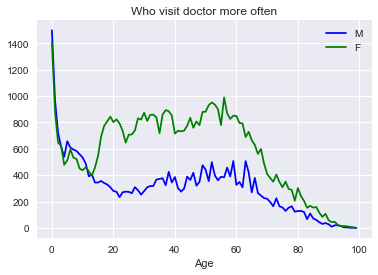

In [82]:
df = noshow_df[noshow_df.Status == 'Show-Up']
range_df = pd.DataFrame()
range_df['Age'] = range(100)
men = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M')]))
women = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F')]))
sns.plt.title('Who visit doctor more often')
plt.xlabel('Age')
plt.plot(range(100),men, 'b')
plt.plot(range(100),women, color = 'g')
plt.legend(['M','F'])
plt.show()

Both men and women visited doctor in a similar fashion till 15 years and from then we can see a sudden spike in female show up. There might be different reasons for it but we dont have enough data to come to a conclusion. From age of 15 woman are twice more likely to visit doctor when compared to men.

### Features based patterns

#### 4. Probability of Show Up with respect to different features

In [83]:
#Function to calculate and return probability of No-Show
def prob_noshow(dataset,group_by):
    df = pd.crosstab(index = dataset[group_by],columns = dataset.Status).reset_index()
    df['probNoShow'] = df['No-Show']/(df['Show-Up']+df['No-Show'])
    return df[[group_by,'probNoShow']]

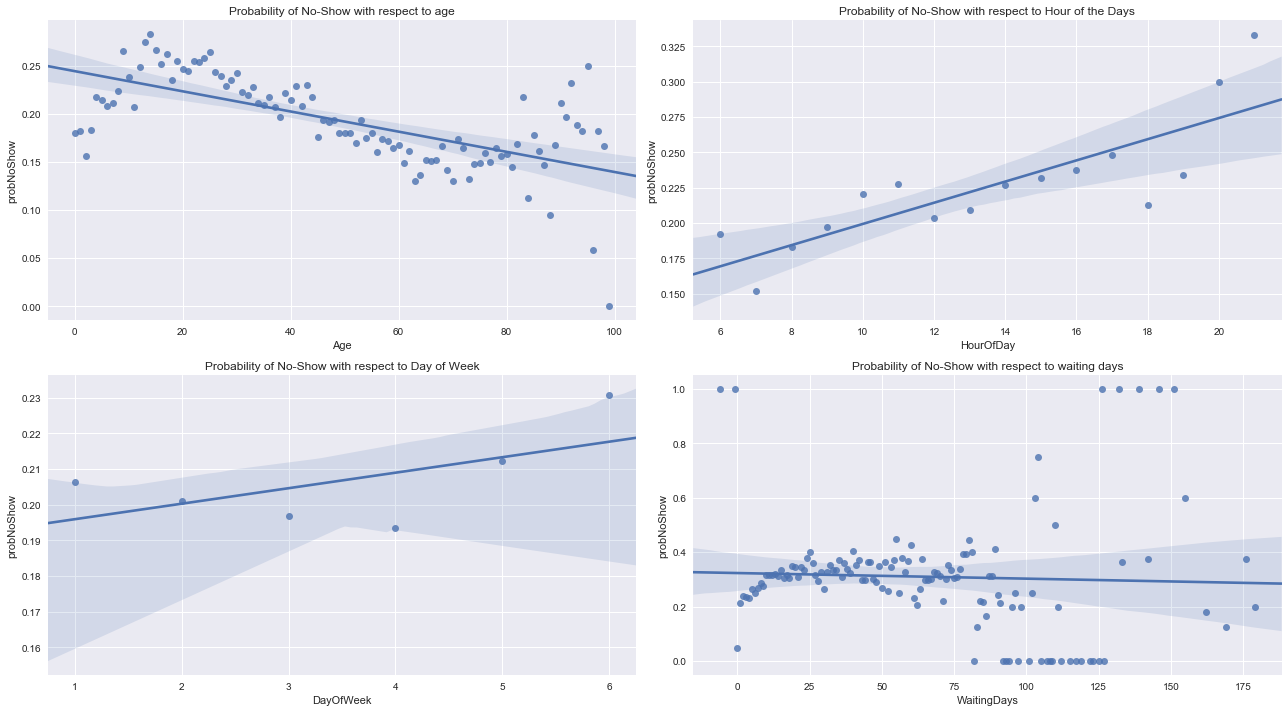

In [84]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(2,2,1)
plt.title('Probability of No-Show with respect to age')
sns.regplot(data = prob_noshow(noshow_df,'Age'),x = 'Age',y = 'probNoShow',ax=ax1)

ax2 = fig.add_subplot(2,2,2)
plt.title('Probability of No-Show with respect to Hour of the Days')
sns.regplot(data = prob_noshow(noshow_df,'HourOfDay'),x = 'HourOfDay',y = 'probNoShow',ax=ax2)

ax3 = fig.add_subplot(2,2,3)
plt.title('Probability of No-Show with respect to Day of Week')
sns.regplot(data = prob_noshow(noshow_df,'DayOfWeek'),x = 'DayOfWeek',y = 'probNoShow',ax=ax3)

ax4 = fig.add_subplot(2,2,4)
plt.title('Probability of No-Show with respect to waiting days')
sns.regplot(data = prob_noshow(noshow_df,'WaitingDays'),x = 'WaitingDays',y = 'probNoShow', ax=ax4)


plt.tight_layout()

plt.show()

1. There is a declining trend in No-Show probability with increase in age, with young adults having higher No-Show rates compared to older adults.
2. No-Show probability is low early in the day,after noon probability of No-Show continue to increase.
3. Over the week Probability of No-Show is less on wednesday and thursday compared to other weekdays.
4. Probability of No-Show is less when the days between regestration and appointment are less than 25. 

#### 5. How does Show-Up/No-Show distribute over a week and Day?

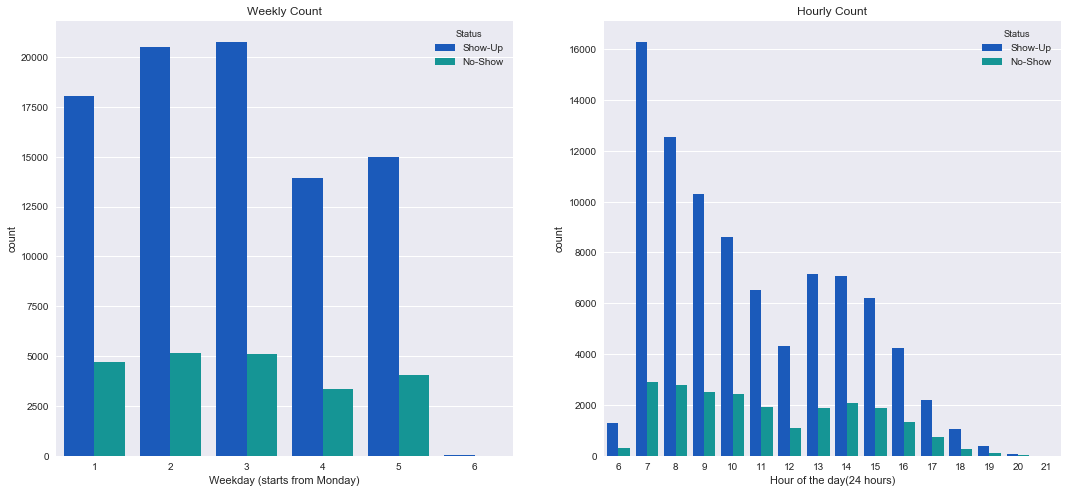

In [85]:
# weekly Distribution
fig1 = plt.figure(figsize=(18,8))
ax = fig1.add_subplot(1,2,1)
ax.set_title("Weekly Count")
sns.countplot(x="DayOfWeek",hue="Status",data=noshow_df,palette='winter',ax=ax)
ax.set_xlabel("Weekday (starts from Monday)")

# Distribution over Day
ax2 = fig1.add_subplot(1,2,2)
ax2.set_title("Hourly Count")
sns.countplot(x="HourOfDay",hue="Status",data=noshow_df,palette='winter',ax=ax2)
ax2.set_xlabel("Hour of the day(24 hours)")

plt.tight_layout
plt.show()

1. First half of the week higher number of people showed up on Tuesday and Thursday with an inclining trend. Intrestingly second half of the week followed the same trend with less number of Show-Up's than first half f the week.
2. More number of people are showing up early in the morning starting from 7am, but over the day number of Show-Up's decline. There is a sudden decline at 12 pm which might be due to lunch break.

### Patterns based on Medical conditions

For this part of analysis we need to transform the data

#### 6. Do patients with different Medical conditions show similar trend of Show-Up  over day?

In [86]:
pv1 = noshow_df.pivot_table(values=["Diabetes","Alcoholism","Hypertension","Handicap"],columns="Status",index=["HourOfDay"],aggfunc=np.sum)

In [87]:
disease_data = pv1.unstack().unstack('Status').reset_index().rename(columns={"level_0":"Category"})

In [88]:
disease_data["Show-Up Rate"] = disease_data['Show-Up'] / (disease_data['No-Show'] + disease_data['Show-Up'])

In [89]:
disease_data.head()

Status,Category,HourOfDay,No-Show,Show-Up,Show-Up Rate
0,Diabetes,6,42,132,0.758621
1,Diabetes,7,208,1223,0.854647
2,Diabetes,8,155,901,0.853220
3,Diabetes,9,166,809,0.829744
4,Diabetes,10,167,650,0.795594


In [90]:
Diabetes = disease_data[disease_data['Category'] == 'Diabetes']
Alcoholism = disease_data[disease_data['Category'] == 'Alcoholism']
Handicap = disease_data[disease_data['Category'] == 'Handicap']
Hypertension = disease_data[disease_data['Category'] == 'Hypertension']

trace0 = go.Scatter(
    x= Diabetes['HourOfDay'],
    y=Diabetes['Show-Up'],
    mode= 'lines+markers',
    text=Diabetes['Category'],
    name="Diabetes")

trace1 = go.Scatter(
    x= Alcoholism['HourOfDay'],
    y=Alcoholism['Show-Up'],
    mode= 'lines+markers',
    text=Alcoholism['Category'],
    name="Alcoholism")

trace2 = go.Scatter(
    x= Handicap['HourOfDay'],
    y=Handicap['Show-Up'],
    mode= 'lines+markers',
    text=Handicap['Category'],
    name='Handcap')

trace3 = go.Scatter(
    x= Hypertension['HourOfDay'],
    y=Hypertension['Show-Up'],
    mode= 'lines+markers',
    text=Hypertension['Category'],
    name='Hypertension')

layout = dict(title = "Show-Up over Day",hovermode='closest',xaxis=dict({"title":"Hour of Day"}),
             yaxis=dict({"title":"Show-Up"}))
dat = [trace0,trace1,trace2,trace3]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='basic-line')

Patients with different medical conditions show similar pattern of Show-Up over day to popuation.

#### 7. Do patients with different Medical conditions show different Show-Up rate over day?

In [91]:
trace0 = go.Scatter(
    x= Diabetes['HourOfDay'],
    y=Diabetes['Show-Up Rate'],
    mode= 'lines+markers',
    text=Diabetes['Category'],
    name="Diabetes")

trace1 = go.Scatter(
    x= Alcoholism['HourOfDay'],
    y=Alcoholism['Show-Up Rate'],
    mode= 'lines+markers',
    text=Alcoholism['Category'],
    name="Alcoholism")

trace2 = go.Scatter(
    x= Handicap['HourOfDay'],
    y=Handicap['Show-Up Rate'],
    mode= 'lines+markers',
    text=Handicap['Category'],
    name='Handicap')

trace3 = go.Scatter(
    x= Hypertension['HourOfDay'],
    y=Hypertension['Show-Up Rate'],
    mode= 'lines+markers',
    text=Hypertension['Category'],
    name='Hipertension')

layout = dict(title = "Show-Up Rate over Day",hovermode='closest',xaxis=dict({"title":"Hour of Day"}),
             yaxis=dict({"title":"Show-Up Rate"}))
dat = [trace0,trace1,trace2,trace3]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='basic-line')

1. Alcoholics and Handicapped show lower Show-Up rate.
2. Alcoholics tend to show-up at higher rate between 10am-12pm,4pm and 7pm. They are less likely to show-up after 7pm.
3. Handicapped tend to show-up at higer rate between 6pm-7pm.
4. Patients with diabetes and hypertension tend to show-up at higher rate during day time through out the day, but patients with hypertension are less likely to show-up after 7pm.

#### 8. Do patients with different Medical conditions show similar trend of Show-Up  over week?

In [92]:
pv2 = noshow_df.pivot_table(values=["Diabetes","Alcoholism","Hypertension","Handicap"],columns="Status",index=["DayOfWeek"],aggfunc=np.sum)

In [93]:
week_data = pv2.unstack().unstack('Status').reset_index().rename(columns={"level_0":"Category"})

In [94]:
week_data["Show-Up Rate"] = week_data['Show-Up'] / (week_data['No-Show'] + week_data['Show-Up'])

In [95]:
week_data.head()

Status,Category,DayOfWeek,No-Show,Show-Up,Show-Up Rate
0,Diabetes,1,328,1243,0.791216
1,Diabetes,2,295,1580,0.842667
2,Diabetes,3,316,1508,0.826754
3,Diabetes,4,202,1001,0.832086
4,Diabetes,5,287,1176,0.803828


In [96]:
Diabetes = week_data[week_data['Category'] == 'Diabetes']
Alcoholism = week_data[week_data['Category'] == 'Alcoholism']
Handicap = week_data[week_data['Category'] == 'Handicap']
Hypertension = week_data[week_data['Category'] == 'Hypertension']

trace0 = go.Scatter(
    x= Diabetes['DayOfWeek'],
    y=Diabetes['Show-Up'],
    mode= 'lines+markers',
    text=Diabetes['Category'],
    name="Diabetes")

trace1 = go.Scatter(
    x= Alcoholism['DayOfWeek'],
    y=Alcoholism['Show-Up'],
    mode= 'lines+markers',
    text=Alcoholism['Category'],
    name="Alcoholism")

trace2 = go.Scatter(
    x= Handicap['DayOfWeek'],
    y=Handicap['Show-Up'],
    mode= 'lines+markers',
    text=Handicap['Category'],
    name='Handcap')

trace3 = go.Scatter(
    x= Hypertension['DayOfWeek'],
    y=Hypertension['Show-Up'],
    mode= 'lines+markers',
    text=Hypertension['Category'],
    name='Hipertension')

layout = dict(title = "Show-Up over week",hovermode='closest',xaxis=dict({"title":"Day of Week(Mon-Sat)"}),
             yaxis=dict({"title":"Show-Up"}))
dat = [trace0,trace1,trace2,trace3]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='basic-line')

Patients with different medical conditions show similar trend in show-up over a week to population

#### 9. Do patients with different Medical conditions show different Show-Up rate over week?

In [97]:
trace0 = go.Scatter(
    x= Diabetes['DayOfWeek'],
    y=Diabetes['Show-Up Rate'],
    mode= 'lines+markers',
    text=Diabetes['Category'],
    name="Diabetes")

trace1 = go.Scatter(
    x= Alcoholism['DayOfWeek'],
    y=Alcoholism['Show-Up Rate'],
    mode= 'lines+markers',
    text=Alcoholism['Category'],
    name="Alcoholism")

trace2 = go.Scatter(
    x= Handicap['DayOfWeek'],
    y=Handicap['Show-Up Rate'],
    mode= 'lines+markers',
    text=Handicap['Category'],
    name='Handicap')

trace3 = go.Scatter(
    x= Hypertension['DayOfWeek'],
    y=Hypertension['Show-Up Rate'],
    mode= 'lines+markers',
    text=Hypertension['Category'],
    name='Hipertension')

layout = dict(title = "Show-Up Rate over week",hovermode='closest',xaxis=dict({"title":"Day of week(Mon-Sat)"}),
             yaxis=dict({"title":"Show-Up Rate"}))
dat = [trace0,trace1,trace2,trace3]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='basic-line')

1. show-up rate of alcoholics,handicapped increased over week 
2. Patients with Diabetes, Hypertension have shown a consistant show-up through out the week.
3. extreme spikes on day6(Saturday) are due to less number of appintments.

#### 10. Show-Up Rate of patients among different age groups

In [98]:
pv3 = noshow_df.pivot_table(values=["Diabetes","Alcoholism","Hypertension","Handicap"],columns="Status",index="AgeGroup",aggfunc=np.sum)

In [99]:
Age_data = pv3.unstack().unstack('Status').reset_index().rename(columns={"level_0":"Category"})

In [100]:
Age_data["Show-Up Rate"] =  Age_data['Show-Up']/(Age_data['No-Show'] + Age_data['Show-Up'])

In [101]:
Age_data.head()

Status,Category,AgeGroup,No-Show,Show-Up,Show-Up Rate
0,Diabetes,Kids,3,5,0.625000
1,Diabetes,Older Adults,819,3740,0.820355
2,Diabetes,Seniors,533,2574,0.828452
3,Diabetes,Teens,13,30,0.697674
4,Diabetes,Young Adults,62,164,0.725664


In [102]:
kids = Age_data[Age_data['AgeGroup'] == 'Kids']
Teens = Age_data[Age_data['AgeGroup'] == 'Teens']
YoungAdults = Age_data[Age_data['AgeGroup'] == 'Young Adults']
OlderAdults = Age_data[Age_data['AgeGroup'] == 'Older Adults']
Seniors = Age_data[Age_data['AgeGroup'] == 'Seniors']


trace0 = go.Bar(
    x= kids['Category'],
    y=kids['Show-Up Rate'],
    text=kids['AgeGroup'],
    name="Kids")

trace1 = go.Bar(
    x= Teens['Category'],
    y=Teens['Show-Up Rate'],
    text=Teens['AgeGroup'],
    name="Teens")

trace2 = go.Bar(
    x= YoungAdults['Category'],
    y=YoungAdults['Show-Up Rate'],
    text=YoungAdults['AgeGroup'],
    name="YoungAdults")

trace3 = go.Bar(
    x= OlderAdults['Category'],
    y=OlderAdults['Show-Up Rate'],
    text=OlderAdults['AgeGroup'],
    name="OlderAdults")

trace4 = go.Bar(
    x= Seniors['Category'],
    y=Seniors['Show-Up Rate'],
    text=Seniors['AgeGroup'],
    name="Seniors")


layout = dict(title = "Show-Up rate by age group",barmode='group',xaxis=dict({"title":"Diseases"}),
             yaxis=dict({"title":"Rate"}))
dat = [trace0,trace1,trace2,trace3,trace4]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='grouped-bar')

1. Among patients with Diabetes show-up rate increases by age. 
2. Teen Alcoholics, Teens with hypertension show-up less compared to other age groups.
3. Kids with hypertension and Alcoholism show-up more than their teen counterparts.

#### 11. Show-Up rate of patients based on gender

In [103]:
pv4 = noshow_df.pivot_table(values=["Diabetes","Alcoholism","Hypertension","Handicap"],columns="Status",index="Gender",aggfunc=np.sum)

In [104]:
Gender_data = pv4.unstack().unstack('Status').reset_index().rename(columns={"level_0":"Category"})

In [105]:
Gender_data["Show-Up Rate"] =  Gender_data['Show-Up']/(Gender_data['No-Show'] + Gender_data['Show-Up'])

In [106]:
Gender_data

Status,Category,Gender,No-Show,Show-Up,Show-Up Rate
0,Diabetes,F,1017,4589,0.818587
1,Diabetes,M,413,1924,0.823278
2,Alcoholism,F,308,915,0.748160
3,Alcoholism,M,369,1768,0.827328
4,Hypertension,F,2657,12681,0.826770
5,Hypertension,M,1115,5347,0.827453
6,Handicap,F,268,1132,0.808571
7,Handicap,M,182,871,0.827160


In [107]:
Male = Gender_data[Gender_data['Gender'] == 'M']
Female = Gender_data[Gender_data['Gender'] == 'F']

trace0 = go.Bar(
    x= Male['Category'],
    y=Male['Show-Up Rate'],
    text=Male['Gender'],
    name="Male")

trace1 = go.Bar(
    x= Female['Category'],
    y=Female['Show-Up Rate'],
    text=Female['Gender'],
    name="Female")


layout = dict(title = "Show-Up rate by Gender",barmode='group',xaxis=dict({"title":"Diseases"}),
             yaxis=dict({"title":"Rate"}))
dat = [trace0,trace1]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='grouped-bar')

Show-up rate among men and woman with different medical conditions is nearly same among all conditions, but woman alcoholics show-up less than men.

#### 12. Is there any correlation between variables?

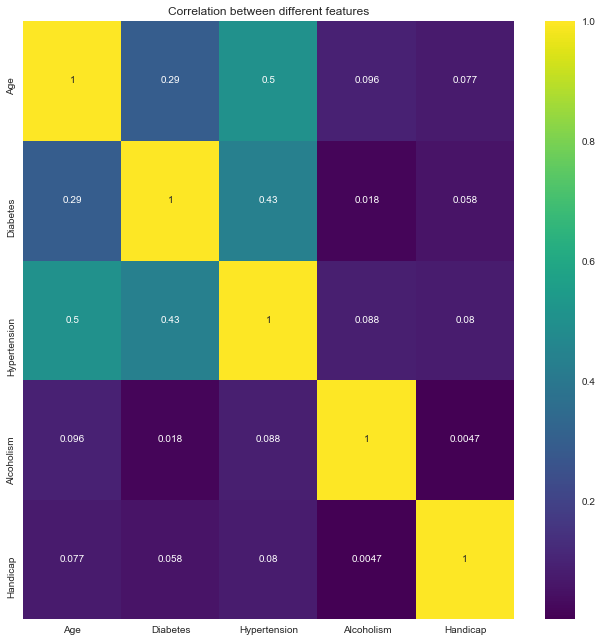

In [108]:
corrilation_matrix = noshow_df[['Gender', 'Age','Diabetes','Hypertension','Alcoholism','Handicap']].corr()
plt.figure(figsize=(11,11))
sns.heatmap(corrilation_matrix, cmap = 'viridis', annot=True)
plt.title('Correlation between different features')
plt.show()

1. Hypertension and Diabetes have moderately positive correlation with age.
2. Hypertension and Diabetes inturn have moderately positive correlation.
3. Other variables have weak correlation.

### 4. Conclusions

1. Among the population nearly 20% do not show up on the day of appointment
2. Female population is more than the male population, percentage of No-Show among both the genders is nearly 20%.
3. Among all the age groups men and woman till the age of 15 attend the doctor at same rate. But after 15 years there are more than 2.5 woman visits for every man visit.
4. Among all age groups No-Show rate is high among teen's. Adults and Seniors have less No-Show rate.
4. More patients Show-Up on Tuesday and wednesday from 7am-12pm.
5. Alcoholics, Handicapped have low Show-Up rate among all the patients. 
6. More alcoholics Show-Up between 10am-12pm.
7. Among Alcoholics ,patients with Hypertension teens have lower Show-Up rate.
8. Show-up rate among men and woman with different medical conditions is nearly same among all conditions, but woman alcoholics show-up less than men.
9. Hypertension and Diabetes have moderately positive correlation with age.

#### References
1. [Kaggle-Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments/data)
2. Numpy and Pandas documentation
3. Matplotlib documentation
4. Python for Data Analysis by Wes McKinney